<a href="https://colab.research.google.com/github/saniyanafees6/finance-stock-prediction/blob/updates/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock Prediction and Analysis 
Hello everyone, this is my first stock prediction application using machine learning. Today I will be using the Apple's stock data from the past 9 years to perform data analysis and prediction for future stock prices. I will do this by using three different Machine Learning Models from sklearn library:
- Linear Regression
- K Nearest Neighbors (KNN)
- Long Short Term Memory (LSTM)

In [0]:
#import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))



## Reading the Data

In [2]:
url = 'https://raw.githubusercontent.com/saniyanafees6/finance-stock-prediction/master/AAPL.csv'
#read the file
df = pd.read_csv(url)


df.index = df['Date']
#printing the last 5 rows of data
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-09-07,2010-09-07,36.662857,37.075714,36.607143,36.830002,32.142021,85639400
2010-09-08,2010-09-08,37.111427,37.770000,37.014286,37.560001,32.779102,131637800
2010-09-09,2010-09-09,37.862858,38.074287,37.560001,37.581429,32.797817,109643800
2010-09-10,2010-09-10,37.598572,37.785713,37.342857,37.630001,32.840195,96885600
2010-09-13,2010-09-13,37.974285,38.325714,37.965714,38.148571,33.292770,97195000
2010-09-14,2010-09-14,38.029999,38.452858,37.931427,38.294285,33.419926,102037600
2010-09-15,2010-09-15,38.310001,38.625713,38.262856,38.602856,33.689224,107342200
2010-09-16,2010-09-16,38.605713,39.524284,38.500000,39.509998,34.480896,163025800
2010-09-17,2010-09-17,39.669998,39.708572,39.097141,39.338570,34.331295,158619300


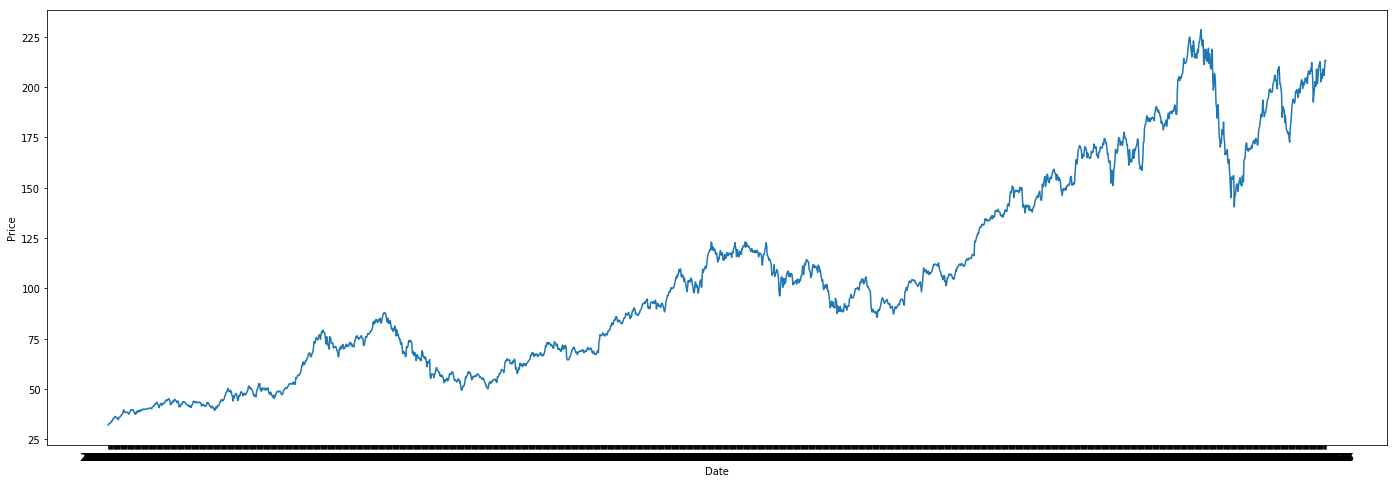

In [3]:
#plot
plt.figure(figsize=(24,8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df['Adj Close'], label='Adjusted Close Price history')


In [0]:
!pip install fastai==0.7.0

     |████████████████████████████████| 122kB 2.8MB/s 
     |████████████████████████████████| 1.5MB 9.7MB/s 
     |████████████████████████████████| 496.4MB 23kB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp36-cp36m-linux_x86_64.whl size=2664857 sha256=0116b3d68507663d1c09a9c9cf140e3043564986127015a2dd3da4a61372a791
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz
ERROR: torchvision 0.3.0 has requirement torch>=1.1.0, but you'll have torch 0.3.1 which is incompatible.
  Found existing installation: torch 1.1.0
    Uninstalling torch-1.1.0:
      Successfully uninstalled torch-1.1.0
  Found existing installation: fastai 1.0.57
    Uninstalling fastai-1.0.57:
      Successfully uninstalled fastai-1.0.57


## Creating a new Dataset by removing unwanted values

In [5]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Adj Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = str(data['Date'][i].date()).replace('-','')
    new_data['Adj Close'][i] = data['Adj Close'][i]
    
new_data

,Date,Adj Close
0,20100907,32.142
1,20100908,32.7791
2,20100909,32.7978
3,20100910,32.8402
4,20100913,33.2928
5,20100914,33.4199
6,20100915,33.6892
7,20100916,34.4809
8,20100917,34.3313
9,20100920,35.3112


In [0]:
#split into train and validation
train = new_data[:1100]
valid = new_data[1100:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']




## Performing Analysis

Now we will be performing different analysis. Staring with Linear Regression:

### Linear Regression

In [7]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms


40.572495337948276

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


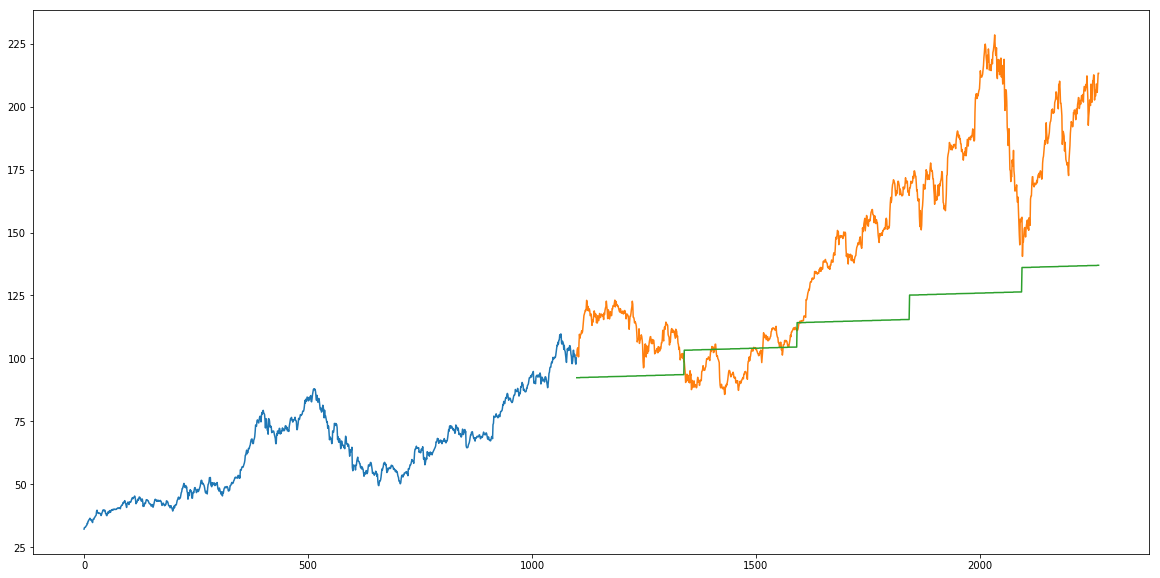

In [9]:
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[1100:].index
train.index = new_data[:1100].index

plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])

## k-Nearest Neghbors

In [0]:

from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [0]:
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [12]:
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

84.77700669784133

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


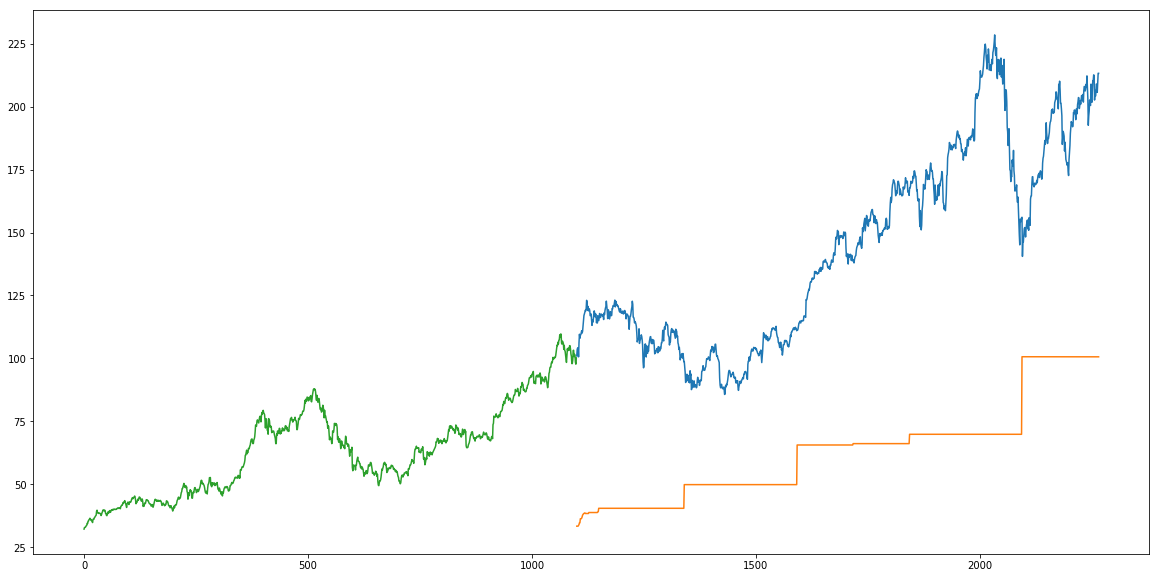

In [13]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Adj Close', 'Predictions']])
plt.plot(train['Adj Close'])

## Long Short Term Memory

In [14]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Adj Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Adj Close'][i] = data['Adj Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:1100,:]
valid = dataset[1100:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Using TensorFlow backend.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
 - 63s - loss: 5.6912e-04


In [15]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

5.991201701873458

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


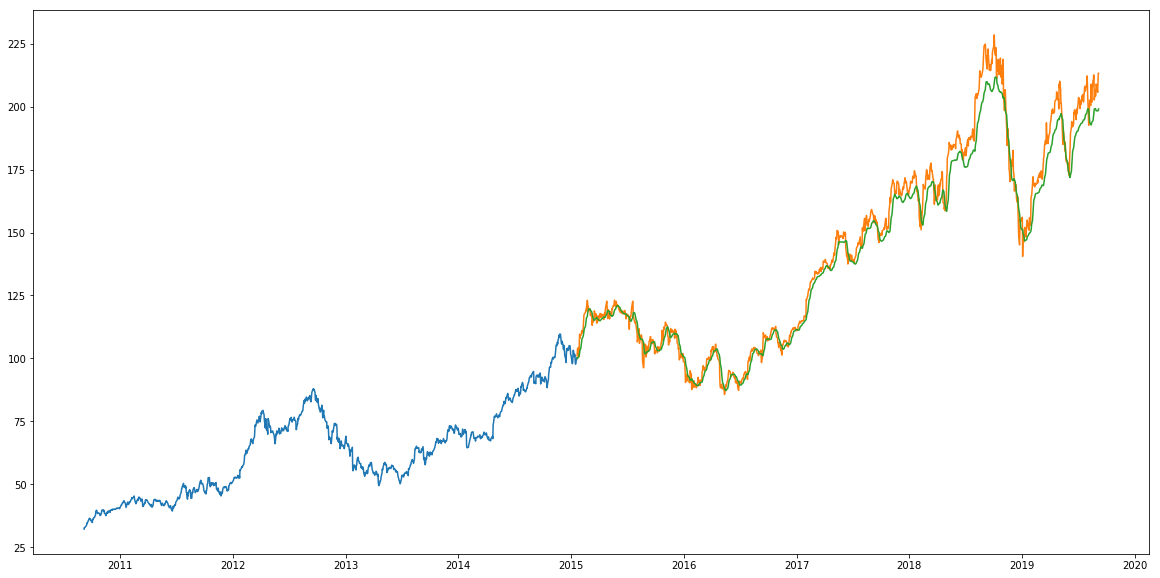

In [17]:
#for plotting
train = new_data[:1100]
valid = new_data[1100:]
valid['Predictions'] = closing_price
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])

## Results


Using a Recurrent Neural Network like LSTM provided a much accurate prediction for the stocks.